In [21]:
import cv2
import os
import pandas as pd
import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler

# Hu Moments

In [22]:
# Carpeta de imágenes
folder = "Data/PetroImages_v2"
hu_moments_list = []
filenames_hu = []

for file in os.listdir(folder):
    path = os.path.join(folder, file)
    img = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        moments = cv2.moments(img)
        hu_moments = cv2.HuMoments(moments).flatten()
        hu_moments_list.append(hu_moments)
        filenames_hu.append(file)

# Crear DataFrame
df_hu = pd.DataFrame(hu_moments_list, columns=[f'HuMoment_{i+1}' for i in range(7)])
df_hu.insert(0, 'filename', filenames_hu)
print(df_hu)

              filename  HuMoment_1    HuMoment_2    HuMoment_3    HuMoment_4  \
0     A1Z01F01_000.png    0.001563  6.405652e-07  1.285048e-10  1.941292e-11   
1     A1Z01F02_000.png    0.001286  1.158816e-08  1.185533e-11  1.884913e-14   
2     A1Z01F03_000.png    0.001339  1.235815e-07  7.131237e-11  1.669773e-12   
3     A1Z01F04_000.png    0.001302  2.096857e-08  9.437973e-11  5.174375e-13   
4     A1Z01F05_000.png    0.001309  5.132798e-08  1.375297e-11  2.938350e-13   
...                ...         ...           ...           ...           ...   
1730  A6Z30F02_105.png    0.004532  9.353512e-06  2.377694e-08  2.379651e-09   
1731  A6Z30F03_105.png    0.005433  5.499196e-06  6.863982e-08  1.494060e-08   
1732  A6Z30F04_105.png    0.003346  4.327556e-06  8.770343e-09  5.631915e-10   
1733  A6Z30F05_105.png    0.003994  5.509862e-06  4.846584e-09  2.145475e-09   
1734  A6Z30F06_105.png    0.015024  1.530940e-04  2.364351e-07  7.276550e-08   

        HuMoment_5    HuMoment_6    HuM

In [25]:
df_hu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1735 entries, 0 to 1734
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   filename    1735 non-null   object 
 1   HuMoment_1  1735 non-null   float64
 2   HuMoment_2  1735 non-null   float64
 3   HuMoment_3  1735 non-null   float64
 4   HuMoment_4  1735 non-null   float64
 5   HuMoment_5  1735 non-null   float64
 6   HuMoment_6  1735 non-null   float64
 7   HuMoment_7  1735 non-null   float64
dtypes: float64(7), object(1)
memory usage: 108.6+ KB


In [24]:
# Descripción estadística del DataFrame df_hu
df_hu.describe()

,HuMoment_1,HuMoment_2,HuMoment_3,HuMoment_4,HuMoment_5,HuMoment_6,HuMoment_7
count,1735.000000,1.735000e+03,1.735000e+03,1.735000e+03,1.735000e+03,1.735000e+03,1.735000e+03
mean,0.005813,3.986473e-05,4.813067e-07,2.545581e-07,2.494279e-11,1.284737e-08,1.721496e-13
std,0.006705,2.309761e-04,5.614472e-06,4.970764e-06,9.252622e-10,3.796364e-07,7.685421e-12
min,0.000804,3.252875e-10,9.454663e-14,3.647947e-16,-2.551672e-11,-3.998076e-08,-3.568792e-11
25%,0.002616,5.669203e-07,8.288699e-10,1.236090e-10,-2.842093e-21,-5.705940e-15,-6.107431e-19
50%,0.003900,2.696717e-06,5.053918e-09,8.756289e-10,6.359844e-20,1.373882e-13,-2.626897e-25
75%,0.006282,1.243757e-05,3.504979e-08,7.179936e-09,2.204054e-17,7.358723e-12,5.988734e-19
max,0.089615,6.263590e-03,1.937397e-04,1.968958e-04,3.845598e-08,1.558229e-05,3.111096e-10


## Normalización

In [3]:
# Copiar el DataFrame
df_hu_norm = df_hu.copy()

# Normalizar solo las columnas de momentos de Hu (no la columna 'filename')
scaler = MinMaxScaler()
hu_columns = [col for col in df_hu_norm.columns if col.startswith('HuMoment_')]
df_hu_norm[hu_columns] = scaler.fit_transform(df_hu_norm[hu_columns])

print(df_hu_norm.head())

           filename  HuMoment_1  HuMoment_2    HuMoment_3    HuMoment_4  \
0  A1Z01F01_000.png    0.008546    0.000102  6.627978e-07  9.859304e-08   
1  A1Z01F02_000.png    0.005431    0.000002  6.070405e-08  9.387876e-11   
2  A1Z01F03_000.png    0.006028    0.000020  3.675955e-07  8.478637e-09   
3  A1Z01F04_000.png    0.005617    0.000003  4.866592e-07  2.626123e-09   
4  A1Z01F05_000.png    0.005694    0.000008  7.049888e-08  1.490485e-09   

   HuMoment_5  HuMoment_6  HuMoment_7  
0    0.000663    0.002559    0.102907  
1    0.000663    0.002559    0.102907  
2    0.000663    0.002559    0.102907  
3    0.000663    0.002559    0.102907  
4    0.000663    0.002559    0.102907  


In [10]:
df_hu_norm.describe()

,HuMoment_1,HuMoment_2,HuMoment_3,HuMoment_4,HuMoment_5,HuMoment_6,HuMoment_7
count,1735.000000,1735.000000,1735.000000,1.735000e+03,1735.000000,1735.000000,1735.000000
mean,0.056403,0.006364,0.002484,1.292857e-03,0.001311,0.003382,0.103403
std,0.075494,0.036876,0.028979,2.524565e-02,0.024044,0.024301,0.022161
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,0.020408,0.000090,0.000004,6.277869e-07,0.000663,0.002559,0.102907
50%,0.034863,0.000430,0.000026,4.447167e-06,0.000663,0.002559,0.102907
75%,0.061692,0.001986,0.000181,3.646566e-05,0.000663,0.002560,0.102907
max,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000


# KMeans

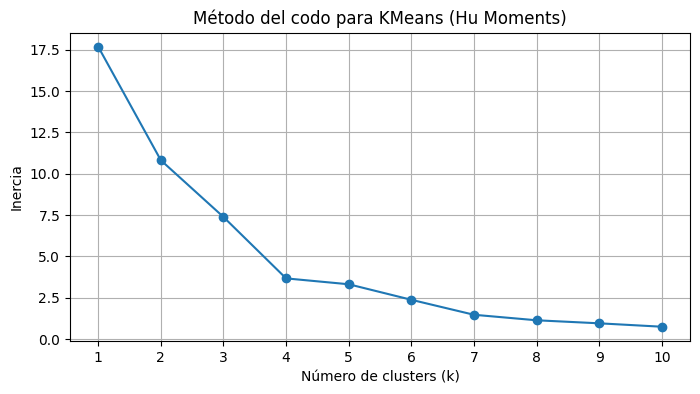

In [13]:
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans_test = KMeans(n_clusters=k, random_state=42)
    kmeans_test.fit(df_hu_norm[hu_columns])
    inertia.append(kmeans_test.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del codo para KMeans (Hu Moments)')
plt.xticks(k_range)
plt.grid(True)
plt.show()

In [ ]:
best_silhouette = -1
best_db = float('inf')
best_labels = None
best_params = {}

X = df_hu_norm[hu_columns]
results = []

for n_clusters in range(4, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)
    silhouette = silhouette_score(X, labels)
    db_index = davies_bouldin_score(X, labels)
    results.append({
        'n_clusters': n_clusters,
        'silhouette': silhouette,
        'davies_bouldin': db_index,
        'labels': labels
    })
    if silhouette > best_silhouette or (silhouette == best_silhouette and db_index < best_db):
        best_silhouette = silhouette
        best_db = db_index
        best_labels = labels
        best_params = {'n_clusters': n_clusters}

print(f"Mejor Silhouette: {best_silhouette:.4f}, Mejor Davies-Bouldin: {best_db:.4f}, Parámetros: {best_params}")

# Guardar el mejor clustering en el DataFrame
df_hu_norm['kmeans_best'] = best_labels

Mejor Silhouette: 0.7464, Mejor Davies-Bouldin: 0.5476, Parámetros: {'n_clusters': 4}


In [23]:
# Imprimir el número de cluster y la cantidad de imágenes asociadas a cada cluster de kmeans_best
cluster_counts = df_hu_norm['kmeans_best'].value_counts().sort_index()
for cluster_id, count in cluster_counts.items():
    print(f"Cluster {cluster_id}: {count} imágenes")

Cluster 0: 1533 imágenes
Cluster 1: 17 imágenes
Cluster 2: 184 imágenes
Cluster 3: 1 imágenes


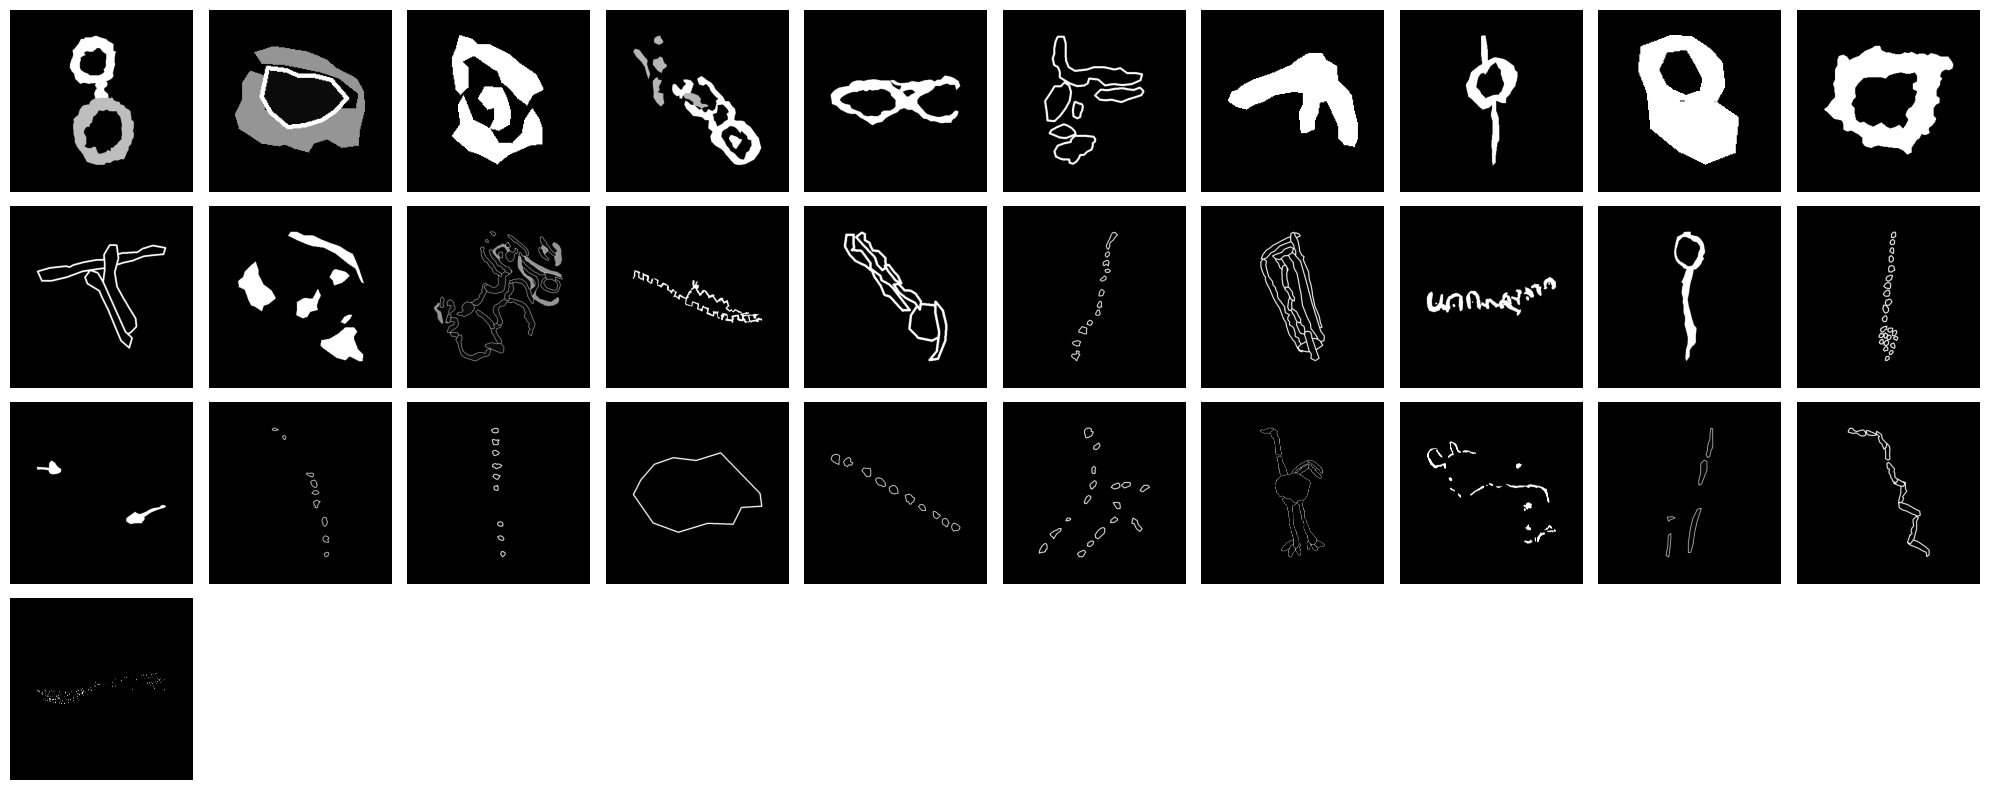

In [ ]:
# Selecciona 10 imágenes aleatorias de cada grupo (kmeans_best)
num_imgs = 10
clusters_kmeans = df_hu_norm['kmeans_best'].unique()
fig, axes = plt.subplots(len(clusters_kmeans), num_imgs, figsize=(num_imgs*2, len(clusters_kmeans)*2))

for idx, cluster_id in enumerate(clusters_kmeans):
    # Filtra las imágenes del cluster actual
    cluster_imgs = df_hu_norm[df_hu_norm['kmeans_best'] == cluster_id]['filename'].tolist()
    # Selecciona aleatoriamente hasta num_imgs imágenes
    selected_imgs = random.sample(cluster_imgs, min(num_imgs, len(cluster_imgs)))
    for j, fname in enumerate(selected_imgs):
        img_path = os.path.join(folder, fname)
        img = Image.open(img_path)
        ax = axes[idx, j] if len(clusters_kmeans) > 1 else axes[j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(f'Cluster {cluster_id}', fontsize=12)
    # Si hay menos de num_imgs imágenes, oculta los ejes restantes
    for j in range(len(selected_imgs), num_imgs):
        ax = axes[idx, j] if len(clusters_kmeans) > 1 else axes[j]
        ax.axis('off')

plt.tight_layout()
plt.show()

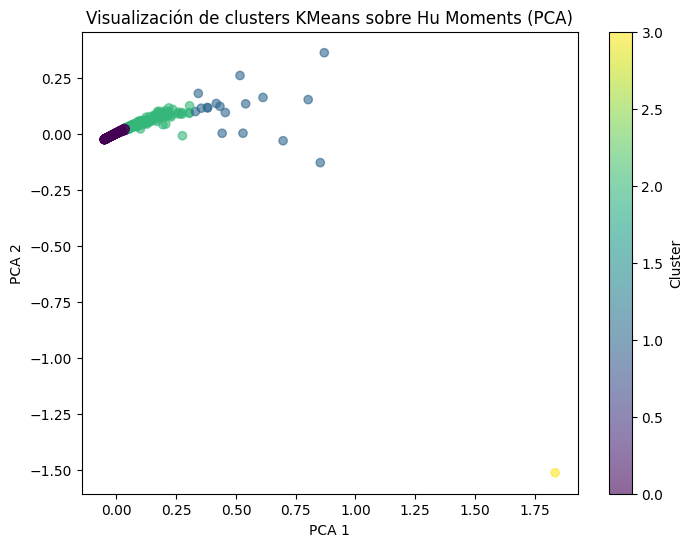

In [19]:
# Reducir la dimensionalidad de los datos normalizados para visualización usando PCA
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_hu_norm[hu_columns])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=df_hu_norm['kmeans_best'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de clusters KMeans sobre Hu Moments (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# DBSCAN

In [20]:
best_silhouette = -1
best_db = float('inf')
best_labels = None
best_params = {}

X_hu = df_hu_norm[hu_columns]

results = []

for eps in [0.01, 0.05, 0.1]:
    for min_samples in [3, 5, 7]:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(X_hu)
        mask = labels != -1
        n_clusters = len(set(labels[mask]))
        if n_clusters > 1:
            silhouette = silhouette_score(X_hu[mask], labels[mask])
            db_index = davies_bouldin_score(X_hu[mask], labels[mask])
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'silhouette': silhouette,
                'davies_bouldin': db_index,
                'labels': labels
            })
            if silhouette > best_silhouette or (silhouette == best_silhouette and db_index < best_db):
                best_silhouette = silhouette
                best_db = db_index
                best_labels = labels
                best_params = {'eps': eps, 'min_samples': min_samples}

print(f"Mejor Silhouette: {best_silhouette:.4f}, Mejor Davies-Bouldin: {best_db:.4f}, Parámetros: {best_params}")

# Guardar el mejor clustering en el DataFrame
df_hu_norm['dbscan_best'] = best_labels

Mejor Silhouette: 0.8686, Mejor Davies-Bouldin: 0.1193, Parámetros: {'eps': 0.05, 'min_samples': 3}


In [24]:
# Imprimir el número de cluster y la cantidad de imágenes asociadas a cada cluster de dbscan_best
cluster_counts_dbscan = df_hu_norm['dbscan_best'].value_counts().sort_index()
for cluster_id, count in cluster_counts_dbscan.items():
    print(f"Cluster {cluster_id}: {count} imágenes")

Cluster -1: 19 imágenes
Cluster 0: 1713 imágenes
Cluster 1: 3 imágenes


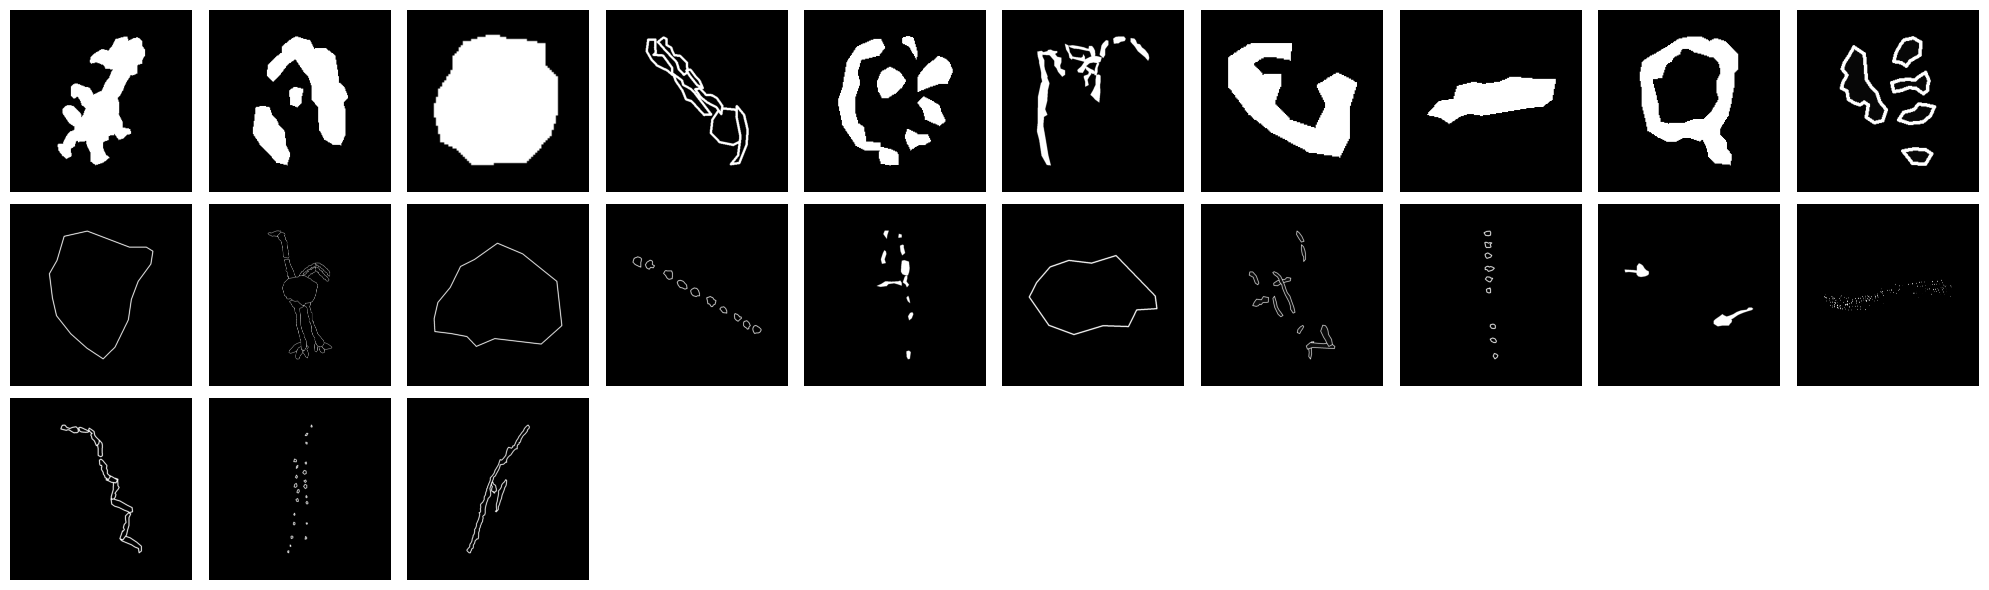

In [ ]:
# Selecciona 10 imágenes aleatorias de cada grupo (dbscan_best)
num_imgs = 10
clusters_dbscan = df_hu_norm['dbscan_best'].unique()
fig, axes = plt.subplots(len(clusters_dbscan), num_imgs, figsize=(num_imgs*2, len(clusters_dbscan)*2))

for idx, cluster_id in enumerate(clusters_dbscan):
    # Filtra las imágenes del cluster actual
    cluster_imgs = df_hu_norm[df_hu_norm['dbscan_best'] == cluster_id]['filename'].tolist()
    # Selecciona aleatoriamente hasta num_imgs imágenes
    selected_imgs = random.sample(cluster_imgs, min(num_imgs, len(cluster_imgs)))
    for j, fname in enumerate(selected_imgs):
        img_path = os.path.join(folder, fname)
        img = Image.open(img_path)
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(f'Cluster {cluster_id}', fontsize=12)
    # Si hay menos de num_imgs imágenes, oculta los ejes restantes
    for j in range(len(selected_imgs), num_imgs):
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.axis('off')

plt.tight_layout()
plt.show()

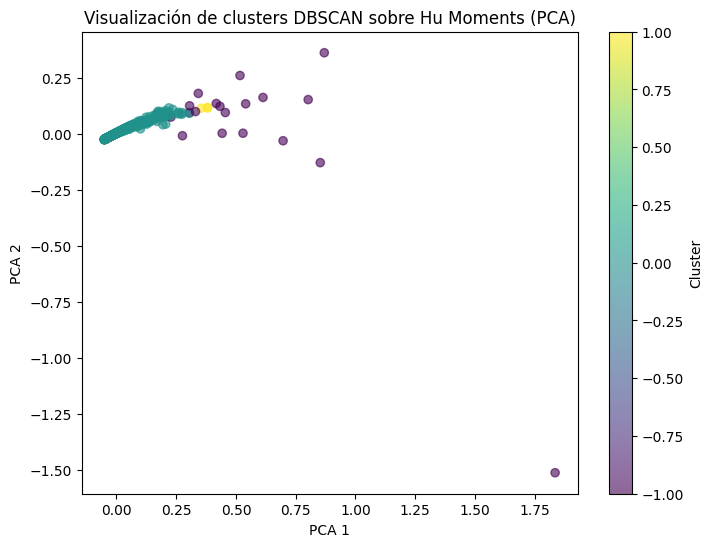

In [25]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_hu_norm[hu_columns])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=df_hu_norm['dbscan_best'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de clusters DBSCAN sobre Hu Moments (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Agglomerative Hierarchical Clustering

In [ ]:
best_silhouette = -1
best_db = float('inf')
best_labels = None
best_params = {}

X_hier = df_hu_norm[hu_columns]
results_agglo = []

for n_clusters in range(3, 11):
    agglo = AgglomerativeClustering(n_clusters=n_clusters)
    labels = agglo.fit_predict(X_hier)
    silhouette = silhouette_score(X_hier, labels)
    db_index = davies_bouldin_score(X_hier, labels)
    results_agglo.append({
        'n_clusters': n_clusters,
        'silhouette': silhouette,
        'davies_bouldin': db_index,
        'labels': labels
    })
    if silhouette > best_silhouette or (silhouette == best_silhouette and db_index < best_db):
        best_silhouette = silhouette
        best_db = db_index
        best_labels = labels
        best_params = {'n_clusters': n_clusters}

print(f"Mejor Silhouette: {best_silhouette:.4f}, Mejor Davies-Bouldin: {best_db:.4f}, Parámetros: {best_params}")

# Guardar el mejor clustering en el DataFrame
df_hu_norm['agglo_best'] = best_labels

Mejor Silhouette: 0.7395, Mejor Davies-Bouldin: 0.5019, Parámetros: {'n_clusters': 3}


In [27]:
# Imprimir el número de cluster y la cantidad de imágenes asociadas a cada cluster de dbscan_best
cluster_counts_dbscan = df_hu_norm['agglo_best'].value_counts().sort_index()
for cluster_id, count in cluster_counts_dbscan.items():
    print(f"Cluster {cluster_id}: {count} imágenes")

Cluster 0: 242 imágenes
Cluster 1: 1 imágenes
Cluster 2: 1492 imágenes


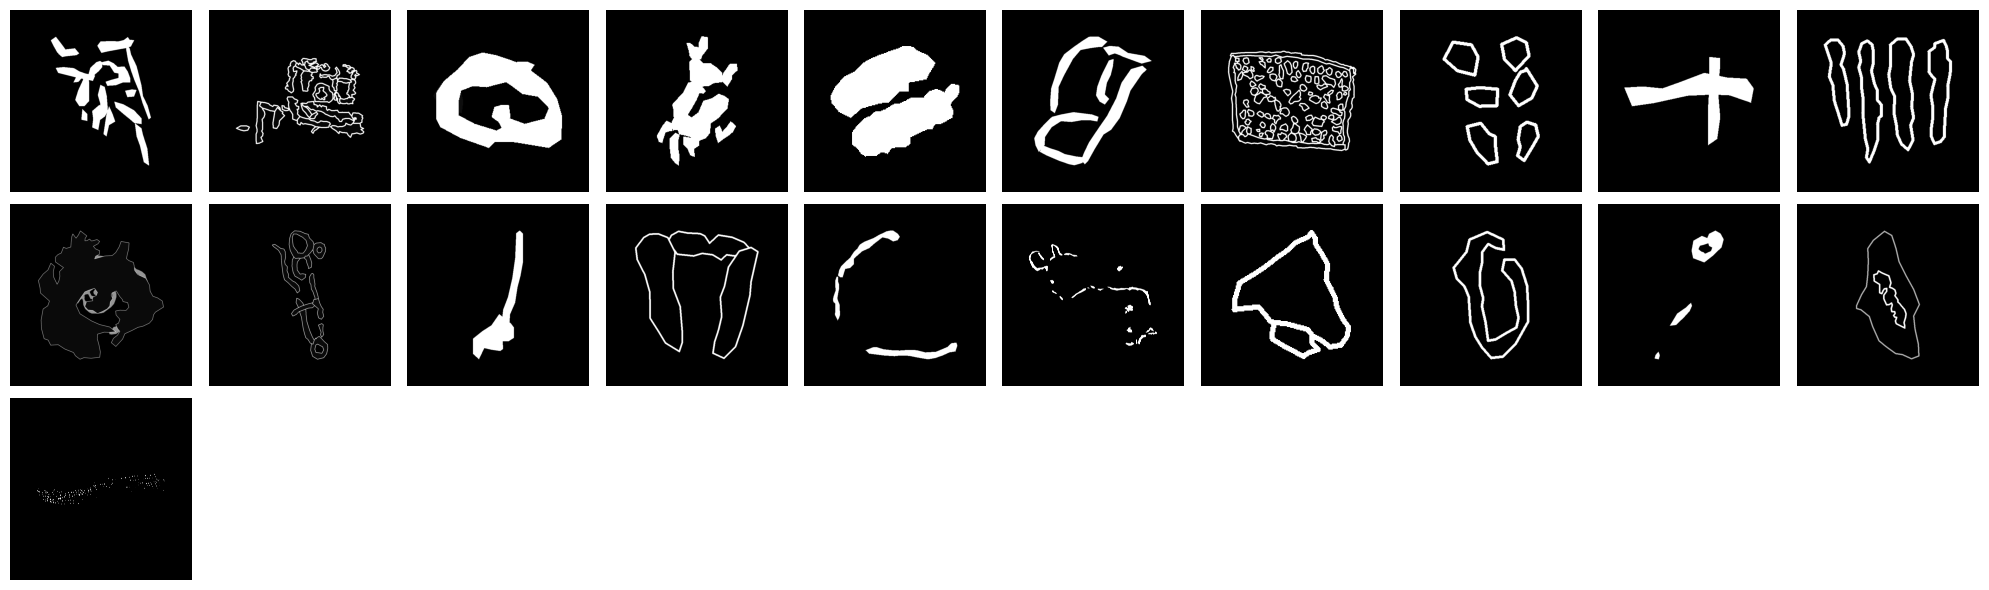

In [ ]:
# Selecciona 10 imágenes aleatorias de cada grupo (dbscan_cluster)
num_imgs = 10
clusters_dbscan = df_hu_norm['agglo_best'].unique()
fig, axes = plt.subplots(len(clusters_dbscan), num_imgs, figsize=(num_imgs*2, len(clusters_dbscan)*2))

for idx, cluster_id in enumerate(clusters_dbscan):
    # Filtra las imágenes del cluster actual
    cluster_imgs = df_hu_norm[df_hu_norm['agglo_best'] == cluster_id]['filename'].tolist()
    # Selecciona aleatoriamente hasta num_imgs imágenes
    selected_imgs = random.sample(cluster_imgs, min(num_imgs, len(cluster_imgs)))
    for j, fname in enumerate(selected_imgs):
        img_path = os.path.join(folder, fname)
        img = Image.open(img_path)
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(f'Cluster {cluster_id}', fontsize=12)
    # Si hay menos de num_imgs imágenes, oculta los ejes restantes
    for j in range(len(selected_imgs), num_imgs):
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.axis('off')

plt.tight_layout()
plt.show()

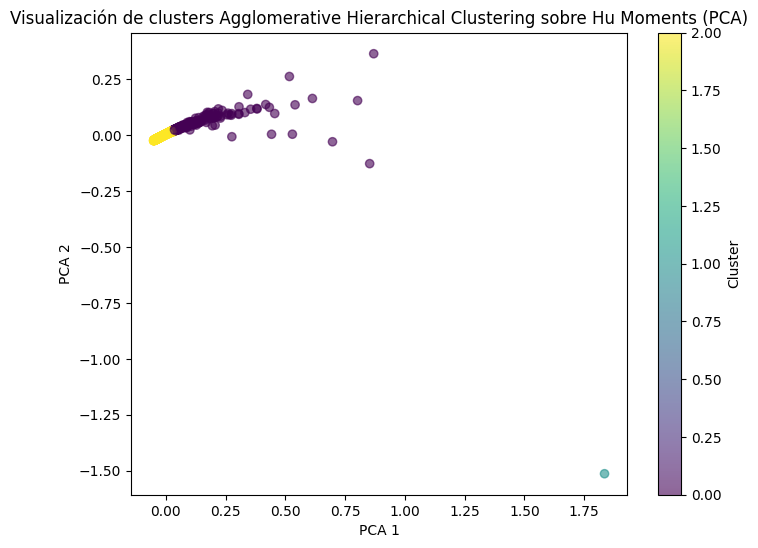

In [29]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_hu_norm[hu_columns])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=df_hu_norm['agglo_best'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de clusters Agglomerative Hierarchical Clustering sobre Hu Moments (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Gaussian Mixture Models (GMM)

In [ ]:
best_silhouette = -1
best_db = float('inf')
best_labels = None
best_params = {}

X_gmm = df_hu_norm[hu_columns]
results_gmm = []

for n_components in range(3, 11):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    labels = gmm.fit_predict(X_gmm)
    silhouette = silhouette_score(X_gmm, labels)
    db_index = davies_bouldin_score(X_gmm, labels)
    results_gmm.append({
        'n_components': n_components,
        'silhouette': silhouette,
        'davies_bouldin': db_index,
        'labels': labels
    })
    if silhouette > best_silhouette or (silhouette == best_silhouette and db_index < best_db):
        best_silhouette = silhouette
        best_db = db_index
        best_labels = labels
        best_params = {'n_components': n_components}

print(f"Mejor Silhouette: {best_silhouette:.4f}, Mejor Davies-Bouldin: {best_db:.4f}, Parámetros: {best_params}")

# Guardar el mejor clustering en el DataFrame
df_hu_norm['gmm_best'] = best_labels

Mejor Silhouette: 0.7923, Mejor Davies-Bouldin: 0.9188, Parámetros: {'n_components': 3}


In [31]:
# Imprimir el número de cluster y la cantidad de imágenes asociadas a cada cluster de gmm
cluster_counts_dbscan = df_hu_norm['gmm_best'].value_counts().sort_index()
for cluster_id, count in cluster_counts_dbscan.items():
    print(f"Cluster {cluster_id}: {count} imágenes")

Cluster 0: 1606 imágenes
Cluster 1: 6 imágenes
Cluster 2: 123 imágenes


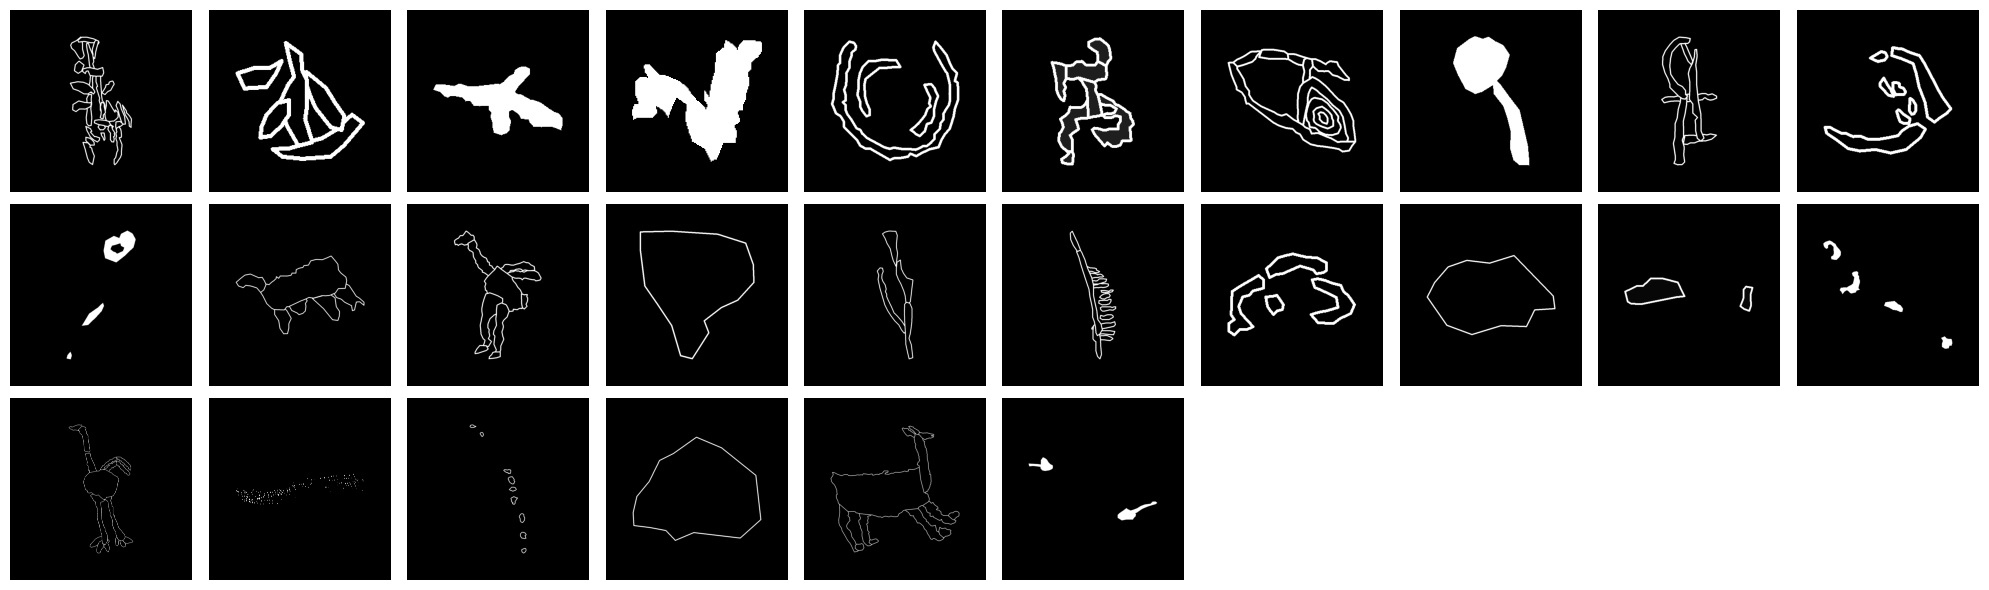

In [32]:
num_imgs = 10
clusters_dbscan = df_hu_norm['gmm_best'].unique()
fig, axes = plt.subplots(len(clusters_dbscan), num_imgs, figsize=(num_imgs*2, len(clusters_dbscan)*2))

for idx, cluster_id in enumerate(clusters_dbscan):
    # Filtra las imágenes del cluster actual
    cluster_imgs = df_hu_norm[df_hu_norm['gmm_best'] == cluster_id]['filename'].tolist()
    # Selecciona aleatoriamente hasta num_imgs imágenes
    selected_imgs = random.sample(cluster_imgs, min(num_imgs, len(cluster_imgs)))
    for j, fname in enumerate(selected_imgs):
        img_path = os.path.join(folder, fname)
        img = Image.open(img_path)
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.imshow(img, cmap='gray')
        ax.axis('off')
        if j == 0:
            ax.set_ylabel(f'Cluster {cluster_id}', fontsize=12)
    # Si hay menos de num_imgs imágenes, oculta los ejes restantes
    for j in range(len(selected_imgs), num_imgs):
        ax = axes[idx, j] if len(clusters_dbscan) > 1 else axes[j]
        ax.axis('off')

plt.tight_layout()
plt.show()

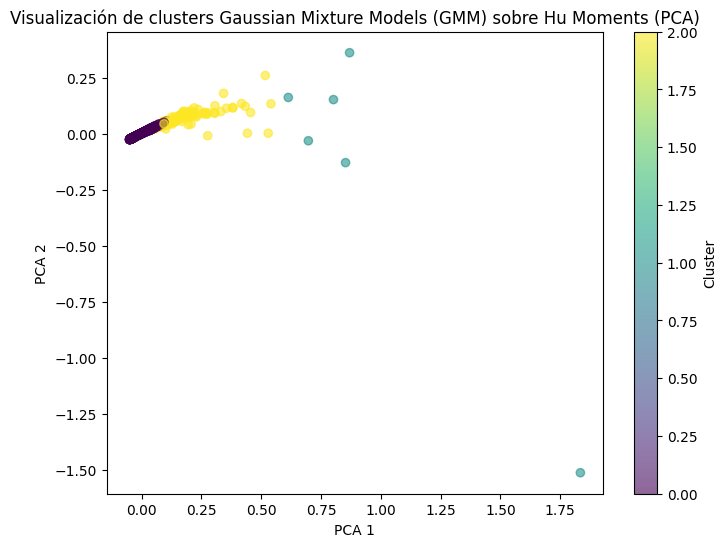

In [33]:
pca_vis = PCA(n_components=2)
X_vis = pca_vis.fit_transform(df_hu_norm[hu_columns])

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_vis[:, 0], X_vis[:, 1], c=df_hu_norm['gmm_best'], cmap='viridis', alpha=0.6)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualización de clusters Gaussian Mixture Models (GMM) sobre Hu Moments (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.show()

# Transformar las imágenes para HOG

In [ ]:
input_folder = "Data/PetroImages_v2"
output_folder = "Data/PetroImages_HOG"
os.makedirs(output_folder, exist_ok=True)

hog = cv2.HOGDescriptor()
hog_features_list = []
filenames = []

for archivo in os.listdir(input_folder):
    ruta_imagen = os.path.join(input_folder, archivo)
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        # Redimensionar a (64, 64)
        img_resized = cv2.resize(img, (64, 64))
        # Rellenar columnas de ceros a ambos lados para centrar a (64, 128)
        pad_width = (128 - 64) // 2
        img_padded = np.pad(img_resized, ((0, 0), (pad_width, pad_width)), mode='constant', constant_values=0)
        # Guardar imagen transformada
        cv2.imwrite(os.path.join(output_folder, archivo), img_padded)

# Extracción de descriptores HOG 

In [ ]:
# Ruta de la carpeta con las imágenes
carpeta = "Data/PetroImages_HOG"

# Inicializar el descriptor HOG de OpenCV
hog = cv2.HOGDescriptor()

# Listas para almacenar los resultados
hog_features_list = []
filenames = []

for archivo in os.listdir(carpeta):
    ruta_imagen = os.path.join(carpeta, archivo)
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
    # Redimensionar la imagen al tamaño esperado por defecto por HOGDescriptor (64x128)
    img_resized = cv2.resize(img, (64, 128))
    features = hog.compute(img_resized)
    hog_features_list.append(features.flatten())
    filenames.append(archivo)

# Crear un DataFrame de pandas
df_hog_cv = pd.DataFrame(hog_features_list)
df_hog_cv.insert(0, 'filename', filenames)

# Mostrar el DataFrame
print(df_hog_cv)

              filename    0    1    2    3    4    5    6    7    8  ...  \
0     A1Z01F01_000.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1     A1Z01F02_000.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     A1Z01F03_000.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     A1Z01F04_000.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4     A1Z01F05_000.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1730  A6Z30F02_105.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1731  A6Z30F03_105.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1732  A6Z30F04_105.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1733  A6Z30F05_105.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1734  A6Z30F06_105.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

      3770  3771  3772  3773  3774  3775  3776  3777  3778  3779  
0      0.0   0.0   0

## Eliminación de columnas nulas... (descripción, renombre, ESCALAR...)

In [49]:
df_hog_cv_copy = df_hog_cv.copy()
df_hog_cv_copy = df_hog_cv_copy.loc[:, (df_hog_cv_copy != 0).any(axis=0)]
print(df_hog_cv_copy)

              filename  576  584  585  593  594  595  596  597  598  ...  \
0     A1Z01F01_000.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1     A1Z01F02_000.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2     A1Z01F03_000.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
3     A1Z01F04_000.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
4     A1Z01F05_000.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...                ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
1730  A6Z30F02_105.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1731  A6Z30F03_105.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1732  A6Z30F04_105.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1733  A6Z30F05_105.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
1734  A6Z30F06_105.png  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

      3178  3179  3180  3181  3182  3183  3184  3185  3186  3194  
0      0.0   0.0   0

# Extracción descriptores SIFT

In [6]:
sift = cv2.SIFT_create()

ruta_imagen = "Data/PetroImages_v2/A6Z30F01_105.png"
sift_features_list = []
filenames_sift = []

img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
keypoints, descriptors = sift.detectAndCompute(img, None)
print(f"Keypoints: {len(keypoints)}, Descriptors shape: {descriptors.shape if descriptors is not None else 'None'}")
print
print(descriptors)



Keypoints: 238, Descriptors shape: (238, 128)
[[ 0.  0.  0. ...  0.  0.  0.]
 [13.  0.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  0.  0.  0.]
 ...
 [38. 12.  0. ...  0.  0.  0.]
 [ 0.  0.  0. ...  1.  4.  0.]
 [32.  3.  0. ...  0.  0.  0.]]


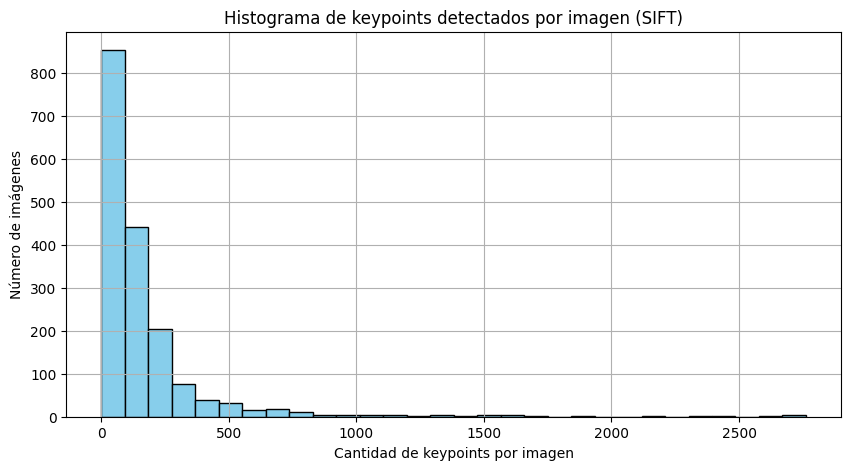

In [8]:
# Contar los keypoints de cada imagen en la carpeta usando SIFT y graficar histograma
sift = cv2.SIFT_create()
keypoints_counts = []
filenames_hist = []

for archivo in os.listdir(folder):
    ruta = os.path.join(folder, archivo)
    img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        kps = sift.detect(img, None)
        keypoints_counts.append(len(kps))
        filenames_hist.append(archivo)

plt.figure(figsize=(10, 5))
plt.hist(keypoints_counts, bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de keypoints por imagen')
plt.ylabel('Número de imágenes')
plt.title('Histograma de keypoints detectados por imagen (SIFT)')
plt.grid(True)
plt.show()

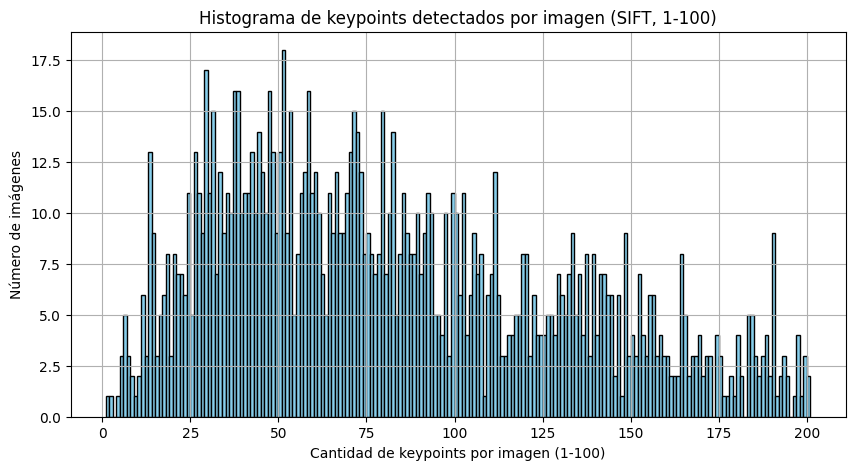

In [11]:
# Contar los keypoints de cada imagen en la carpeta usando SIFT y graficar histograma (solo entre 1 y 100 keypoints)
sift = cv2.SIFT_create()
keypoints_counts_filtered = []

for archivo in os.listdir(folder):
    ruta = os.path.join(folder, archivo)
    img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        kps = sift.detect(img, None)
        n_kps = len(kps)
        if 1 <= n_kps <= 200:
            keypoints_counts_filtered.append(n_kps)

plt.figure(figsize=(10, 5))
plt.hist(keypoints_counts_filtered, bins=range(1, 202), color='skyblue', edgecolor='black')
plt.xlabel('Cantidad de keypoints por imagen (1-200)')
plt.ylabel('Número de imágenes')
plt.title('Histograma de keypoints detectados por imagen (SIFT, 1-200)')
plt.grid(True)
plt.show()

In [7]:
# Contar los keypoints de cada imagen en la carpeta usando SIFT
sift = cv2.SIFT_create()
keypoints_counts = []
filenames = []

for archivo in os.listdir(folder):
    ruta = os.path.join(folder, archivo)
    img = cv2.imread(ruta, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        kps = sift.detect(img, None)
        keypoints_counts.append(len(kps))
        filenames.append(archivo)

# Encontrar la imagen con menos y más keypoints
min_idx = np.argmin(keypoints_counts)
max_idx = np.argmax(keypoints_counts)

min_keypoints_info = (filenames[min_idx], keypoints_counts[min_idx])
max_keypoints_info = (filenames[max_idx], keypoints_counts[max_idx])

print(f"Imagen con menos keypoints: {min_keypoints_info[0]}, cantidad: {min_keypoints_info[1]}")
print(f"Imagen con más keypoints: {max_keypoints_info[0]}, cantidad: {max_keypoints_info[1]}")

Imagen con menos keypoints: A1Z01F30_000.png, cantidad: 1
Imagen con más keypoints: A5Z01F05_072.png, cantidad: 2762


In [14]:
img = cv2.imread("Data/PetroImages_v2/A5Z01F05_072.png")

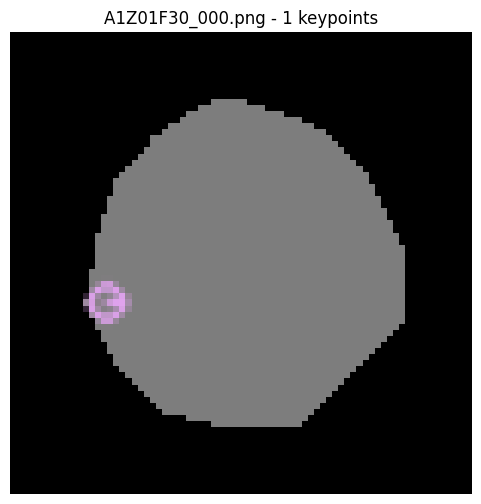

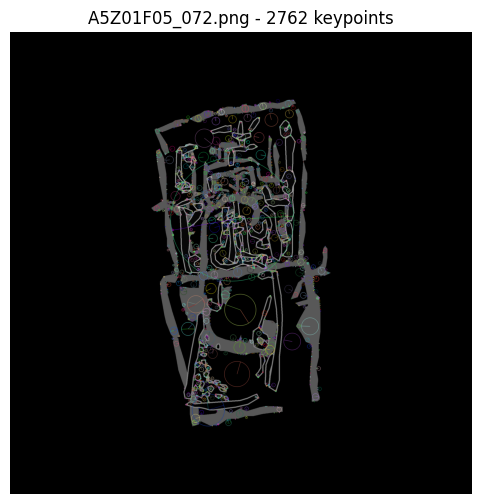

In [16]:
imagenes = ['A1Z01F30_000.png', 'A5Z01F05_072.png']

for img_name in imagenes:
    img_path = os.path.join(folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        kps = sift.detect(img, None)
        img_kp = cv2.drawKeypoints(img, kps, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
        plt.figure(figsize=(6, 6))
        plt.imshow(img_kp, cmap='gray')
        plt.title(f'{img_name} - {len(kps)} keypoints')
        plt.axis('off')
        plt.show()
    else:
        print(f"No se pudo cargar la imagen: {img_name}")

In [15]:
# Imprimir los keypoints encontrados con SIFT para las dos imágenes especificadas
imagenes = ['A1Z01F30_000.png', 'A5Z01F05_072.png']

for img_name in imagenes:
    img_path = os.path.join(folder, img_name)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        kps = sift.detect(img, None)
        print(f"Imagen: {img_name}")
        print(f"Cantidad de keypoints: {len(kps)}")
        for i, kp in enumerate(kps):
            print(f"Keypoint {i+1}: pt={kp.pt}, size={kp.size}, angle={kp.angle}, response={kp.response}, octave={kp.octave}, class_id={kp.class_id}")
        print("-" * 40)
    else:
        print(f"No se pudo cargar la imagen: {img_name}")

Imagen: A1Z01F30_000.png
Cantidad de keypoints: 1
Keypoint 1: pt=(15.496611595153809, 44.00834655761719), size=5.227828025817871, angle=355.6440734863281, response=0.03492908924818039, octave=10420736, class_id=-1
----------------------------------------
Imagen: A5Z01F05_072.png
Cantidad de keypoints: 2762
Keypoint 1: pt=(755.9557495117188, 623.1739501953125), size=3.8316826820373535, angle=355.29705810546875, response=0.021784484386444092, octave=4653312, class_id=-1
Keypoint 2: pt=(756.4788208007812, 908.2215576171875), size=26.144323348999023, angle=51.33416748046875, response=0.043601054698228836, octave=9896706, class_id=-1
Keypoint 3: pt=(756.4788208007812, 908.2215576171875), size=26.144323348999023, angle=272.30023193359375, response=0.043601054698228836, octave=9896706, class_id=-1
Keypoint 4: pt=(756.9541625976562, 637.171875), size=3.829096555709839, angle=355.26702880859375, response=0.021785570308566093, octave=4653312, class_id=-1
Keypoint 5: pt=(757.9116821289062, 647.26

In [ ]:
sift = cv2.SIFT_create()

carpeta = "Data/PetroImages_v2"
sift_features_list = []
filenames_sift = []

for archivo in os.listdir(carpeta):
    ruta_imagen = os.path.join(carpeta, archivo)
    img = cv2.imread(ruta_imagen, cv2.IMREAD_GRAYSCALE)
        keypoints, descriptors = sift.detectAndCompute(img, None)
        if descriptors is not None:
            # Si hay más de 128 keypoints, solo tomamos los primeros 128
            desc = descriptors[:128].flatten()
            # Si hay menos, rellenamos con ceros
            if desc.shape[0] < 128*128:
                desc = np.pad(desc, (0, 128*128 - desc.shape[0]), 'constant')
        else:
            # Si no hay descriptores, rellenamos con ceros
            desc = np.zeros(128*128)
        sift_features_list.append(desc)
        filenames_sift.append(archivo)

# Crear DataFrame
df_sift = pd.DataFrame(sift_features_list)
df_sift.insert(0, 'filename', filenames_sift)

print(df_sift)

              filename     0     1     2      3     4    5    6    7      8  \
0     A1Z01F01_000.png  45.0  91.0   0.0    0.0   0.0  0.0  0.0  0.0  166.0   
1     A1Z01F02_000.png  12.0   0.0   0.0    0.0   0.0  0.0  0.0  3.0  156.0   
2     A1Z01F03_000.png  18.0   0.0   0.0    0.0   0.0  0.0  0.0  5.0  170.0   
3     A1Z01F04_000.png   1.0   0.0   0.0    0.0   0.0  0.0  0.0  1.0   46.0   
4     A1Z01F05_000.png   0.0   0.0   0.0    0.0   0.0  0.0  0.0  0.0   97.0   
...                ...   ...   ...   ...    ...   ...  ...  ...  ...    ...   
1730  A6Z30F02_105.png   0.0   0.0   0.0    0.0   0.0  0.0  0.0  1.0    2.0   
1731  A6Z30F03_105.png   1.0   0.0   0.0    0.0   0.0  0.0  0.0  0.0   60.0   
1732  A6Z30F04_105.png  16.0   1.0  12.0  144.0  12.0  0.0  0.0  7.0  144.0   
1733  A6Z30F05_105.png   0.0   0.0   0.0    0.0   0.0  0.0  0.0  1.0    0.0   
1734  A6Z30F06_105.png  28.0   0.0   0.0    0.0   0.0  0.0  0.0  6.0  137.0   

      ...  16374  16375  16376  16377  16378  16379

# Intento Autoencoder

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow.keras import layers, losses
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Conv2DTranspose
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ModelCheckpoint, Callback, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [5]:
(x_train,_),(x_test,_)= mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [11]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [12]:
print(type(x_train))


<class 'numpy.ndarray'>


In [13]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os
import numpy as np

# Ruta de la carpeta con las imágenes
folder = 'Data/PetroImages_v2'
image_files = [os.path.join(folder, f) for f in os.listdir(folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]

# Cargar y procesar imágenes
images = []
for file in image_files:
    img = load_img(file, color_mode='grayscale', target_size=(224, 224))
    img_arr = img_to_array(img) / 255.0  # Normalizar a [0,1]
    images.append(img_arr)

images = np.array(images)  # (num_images, 224, 224, 1)

# Separar en train y test
x_train_petro, x_test_petro = train_test_split(images, test_size=0.3, random_state=42, shuffle=True)
print(x_train_petro.shape, x_test_petro.shape)

(1214, 224, 224, 1) (521, 224, 224, 1)


In [16]:
from tensorflow.keras import layers, models

# Definir el autoencoder
input_shape = (224, 224, 1)
input_img = layers.Input(shape=input_shape)

# Encoder
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = models.Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Para extraer características, se puede usar el encoder:
encoder = models.Model(input_img, encoded)
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 1)]     0         
                                                                 
 conv2d_7 (Conv2D)           (None, 224, 224, 32)      320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 112, 112, 16)      4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 56, 56, 16)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 56, 56, 8)         1160

In [17]:
filepath = 'autoencoder_epoch{epoch:02d}_loss{loss:.4f}.keras'
model_checkpoint = ModelCheckpoint(
    filepath,
    monitor = 'loss',
    save_best_only = True,
    mode = 'min',
    save_freq = 'epoch')

In [18]:
history = autoencoder.fit(x = x_train_petro,
                y = x_train_petro,
                epochs = 100,
                batch_size = 128,
                shuffle = True,
                callbacks=[model_checkpoint])

Epoch 1/100
10/10 [==============================] - 10s 389ms/step - loss: 0.6661
Epoch 2/100
10/10 [==============================] - 3s 274ms/step - loss: 0.5132
Epoch 3/100
10/10 [==============================] - 3s 277ms/step - loss: 0.2891
Epoch 4/100
10/10 [==============================] - 3s 277ms/step - loss: 0.1815
Epoch 5/100
10/10 [==============================] - 3s 277ms/step - loss: 0.1282
Epoch 6/100
10/10 [==============================] - 3s 276ms/step - loss: 0.1132
Epoch 7/100
10/10 [==============================] - 3s 273ms/step - loss: 0.1090
Epoch 8/100
10/10 [==============================] - 3s 277ms/step - loss: 0.1055
Epoch 9/100
10/10 [==============================] - 3s 276ms/step - loss: 0.1024
Epoch 10/100
10/10 [==============================] - 3s 275ms/step - loss: 0.0996
Epoch 11/100
10/10 [==============================] - 3s 272ms/step - loss: 0.0976
Epoch 12/100
10/10 [==============================] - 3s 274ms/step - loss: 0.0956
Epoch 13/100

In [19]:
autoencoder.save('autoencoder_petro.keras')

In [26]:
encoder.save('encoder_petro.keras')

Text(0, 0.5, 'Loss')

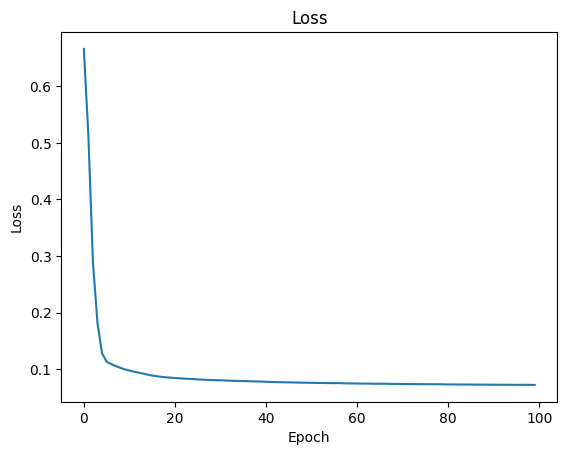

In [20]:
plt.plot(history.history['loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

In [27]:
encoder_result = encoder.predict(x_test_petro)
print(encoder_result.shape)

17/17 [==============================] - 0s 16ms/step
(521, 28, 28, 8)


In [21]:
reconstruction_normal = autoencoder.predict(x_test_petro)

17/17 [==============================] - 1s 31ms/step


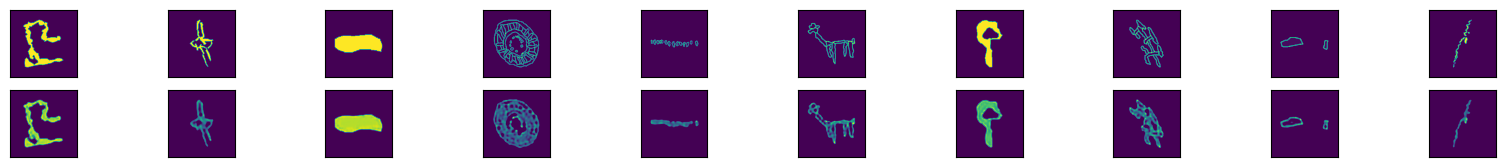

In [25]:
indeces = np.random.randint(len(x_test_petro), size=10)

images_normal = x_test_petro[indeces]
autoencoding_normal = reconstruction_normal[indeces]


plt.figure(figsize=(20, 4))
for i, (image1, image2) in enumerate(zip(images_normal, autoencoding_normal)):
  ax = plt.subplot(4, 10, i + 1)
  plt.imshow(image1.reshape(224, 224))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax= plt.subplot(4, 10, i + 11)
  plt.imshow(image2.reshape(224, 224))
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)


plt.show()